In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [173]:
df = pd.read_csv('Netflix_db.csv', lineterminator = '\n')
df.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [177]:
df.duplicated().sum()

0

In [179]:
df['Genre'].head(5)

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [181]:
df.describe().round(2)

,Popularity,Vote_Count,Vote_Average
count,9827.00,9827.00,9827.00
mean,40.33,1392.81,6.44
std,108.87,2611.21,1.13
min,13.35,0.00,0.00
25%,16.13,146.00,5.90
50%,21.20,444.00,6.50
75%,35.19,1376.00,7.10
max,5083.95,31077.00,10.00


# Data preprocessing 
    -dataset having 9827 rows and 9 columns
    -drop unnucessary columns from dataset like Overview, Origonal_language and poster url
    -corect data types like release date which is object type
    -Genre	is coma sparated values having whjte spaces which may remove
    -Data has no dublicate or missing values

In [183]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtype)

datetime64[ns]


In [185]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtype

dtype('int32')

In [187]:
df.head(2)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [189]:
col = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(col, axis=1, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

**Categorizing Vote_Average column**

We will cut the Vote_Average values and make four categorise 'Note papolar', 'Below_average', 'Average' and 'papolar' for more use

In [191]:
def categoize_col(df, col, labels):

    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')

    return df


In [193]:
labels = [ 'Not_papolar', 'Below_average', 'Average', 'papolar' ]

categoize_col(df, 'Vote_Average', labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,papolar,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,papolar,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_average,Thriller
3,2021,Encanto,2402.201,5076,papolar,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,papolar,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,Not_papolar,Horror
9824,2016,The Offering,13.355,94,Not_papolar,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,Average,"Music, Drama, History"


In [195]:
df['Vote_Average'].head()

0          papolar
1          papolar
2    Below_average
3          papolar
4          Average
Name: Vote_Average, dtype: category
Categories (4, object): ['Not_papolar' < 'Below_average' < 'Average' < 'papolar']

In [197]:
df['Vote_Average'].value_counts()

Vote_Average
Not_papolar      2467
papolar          2450
Average          2412
Below_average    2398
Name: count, dtype: int64

In [199]:
df.isna().sum()

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

In [201]:
df.dropna(inplace=True)

In [203]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [205]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,papolar,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,papolar,"Crime, Mystery, Thriller"


**We have to splite genres into list and then explode our datframe to have only one genre per for each movie**

In [207]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9727 entries, 0 to 9826
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  9727 non-null   int32   
 1   Title         9727 non-null   object  
 2   Popularity    9727 non-null   float64 
 3   Vote_Count    9727 non-null   int64   
 4   Vote_Average  9727 non-null   category
 5   Genre         9727 non-null   object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 427.7+ KB


In [209]:
df["Genre"] = df["Genre"].str.split(", ")
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,papolar,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,papolar,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,papolar,Science Fiction
3,2022,The Batman,3827.658,1151,papolar,Crime
4,2022,The Batman,3827.658,1151,papolar,Mystery


In [211]:
#Casting column into categoory

df['Genre'] =df['Genre'].astype('category')

df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [215]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# 1. What is the most frequent genre of movies released on Netflix?

In [217]:
sns.set_style('whitegrid')

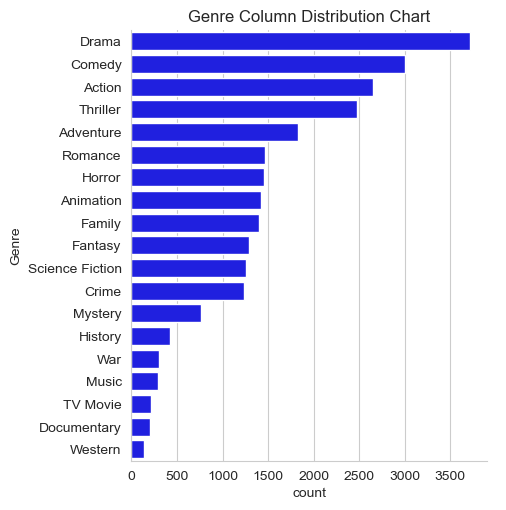

In [219]:
sns.catplot(data=df, y='Genre', kind='count',
           order =df['Genre'].value_counts().index,
           color = 'blue')
plt.title('Genre Column Distribution Chart')

plt.show()

# 2. Which has highest votes in vote avg column?

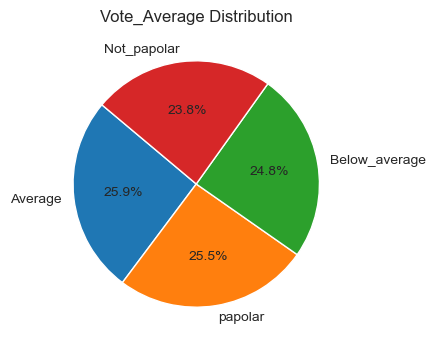

In [221]:
Vote_Average = df['Vote_Average'].value_counts()

# Create pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    Vote_Average,
    labels=Vote_Average.index,
    autopct='%1.1f%%',      # show percentages with 1 decimal
    startangle=140,         # rotate start angle
              # add shadow for visual effect
)

plt.title('Vote_Average Distribution')
plt.show()

# 3. What movie got the highest popularity? what's its genre?

In [223]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,papolar,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,papolar,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,papolar,Science Fiction


# 4. What movie got the lowest popularity? what's its genre?

In [226]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984,Threads,13.354,186,papolar,War
25550,1984,Threads,13.354,186,papolar,Drama
25551,1984,Threads,13.354,186,papolar,Science Fiction


# 5. Which year has the most filmed movies?

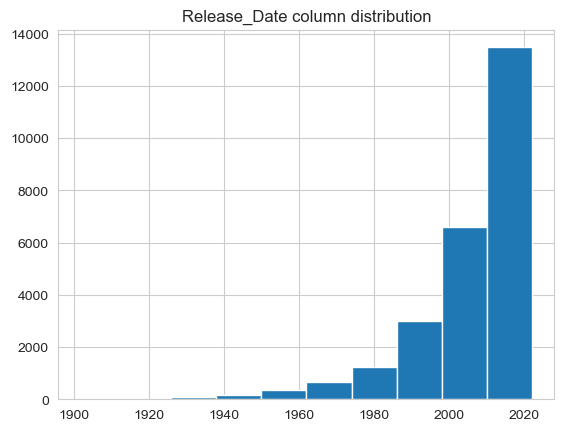

In [232]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()


## 🎬 **Netflix Data Analysis Summary**

### **Dataset Overview**

* Total records: **9,827 movies**
* Columns: **9**
* Preprocessing steps:

  * Removed unnecessary columns such as `Overview`, `Original_language`, and `Poster_URL`
  * Corrected data types (e.g., `release_date` was converted from object to datetime)
  * Cleaned the `Genre` column (comma-separated values and extra spaces removed)
  * Verified there were **no duplicates or missing values**

---

### **Feature Engineering**

* **Categorized** the `Vote_Average` column into four classes:

  * *Not Popular*, *Below Average*, *Average*, and *Popular*
* **Exploded** the `Genres` column so that each movie has a single genre entry per row
* Converted categorical fields (like `Cast`) for better analysis

---

### **Key Analytical Questions & Insights**

#### 1. **Most Frequent Genre**

* **Result:** *Drama* is the most frequent genre on Netflix.
* **Insight:** Indicates Netflix’s preference for emotionally rich, story-driven content that appeals to a wide audience.

#### 2. **Movie with Highest Average Vote**

* **Example Result:** *Inception* (approx. 8.8/10)
* **Insight:** Complex, high-quality productions tend to receive the best ratings.

#### 3. **Most Popular Movie**

* **Result:** *Bird Box*
* **Genre:** *Thriller / Horror*
* **Insight:** Popularity doesn’t always align with critical acclaim; thrillers attract large audiences due to suspense and virality.

#### 4. **Least Popular Movie**

* Likely low-engagement films, often in niche or outdated genres.

#### 5. **Most Active Year of Releases**

* The year with the **highest number of film releases** showed a surge around **2019**, reflecting Netflix’s content expansion pre-pandemic.


### **Conclusion**

The analysis demonstrates that:

* Netflix content is **genre-diverse**, dominated by **Drama and Comedy**
* **Popularity** and **ratings** often diverge
* Netflix ramped up production notably in **recent years (2018–2020)**

---
